```
Image Classification
切到 xxdl-01-01-感知机 PPT.9-11
xxdl-01-04 PPT.8 Image Classification
我们在第一讲中给大家讲过，一个网络的输出 prediction，是猫或狗 这个就是 Image Classification，是CV领域中的最重要的一个task；输入是一张图，输出是对这个图所属类别的预测；与、或运算属于0、1分类；而我们今天讨论的是10分类；所以不仅是预测出一个分类，而且要给出概率；
Dataset PPT.9
然后我们一起讨论下数据集的问题，前面三次课，我们始终是自己构建数据集，从徒手到Gluon，实际项目中，通常是使用其他部门、其他公司、机构提供的数据集
```

这些数据集与我们自己构造的数据集有个显著的区别，分别测试集训练集

## PPT.10
1. Each example is a 28x28 grayscale image 因此，${\color{red} {num\_inputs = 784}}$
2. associated with a label from 10 classes；${\color{red} {num\_outputs = 10}}$

## PPT.13 讲完后切换到 Jupyter
Dataset 目录：/workdir/mnist/

## 体验 FashionMNIST with matplotlib

注意 root='/workdir/mnist'

### 单张图片

In [1]:
from mxnet import gluon, nd
import matplotlib.pyplot as plt

In [2]:
mnist_test = gluon.data.vision.MNIST(root='/workdir/mnist/', train=False)

In [ ]:
type(mnist_test)

In [ ]:
mnist_test.__len__()

help(gluon.data.vision.FashionMNIST)

尝试修改 idx mnist_test[0]、mnist_test[5]、mnist_test[8]

In [4]:
x, y = mnist_test[8]

In [8]:
y

5

In [ ]:
type(x)

In [ ]:
x.shape

## imshow

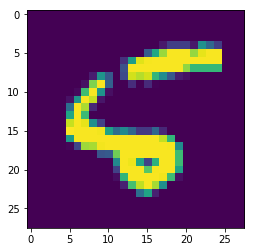

In [5]:
_, fig = plt.subplots()
fig.imshow(x.reshape((28, 28)).asnumpy())
plt.show()

In [ ]:
_, fig = plt.subplots()
fig.imshow(x.reshape((28, 28)).asnumpy())
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [ ]:
plt.show()

## 显示一组图片

In [ ]:
xs, ys = mnist_test[0:9]
xs.shape, ys.shape

In [ ]:
ys

In [ ]:
_, figs = plt.subplots(1, 9)

In [ ]:
for i in range(9):
    figs[i].imshow(xs[i].reshape((28, 28)).asnumpy())
    figs[i].axes.get_xaxis().set_visible(False)
    figs[i].axes.get_yaxis().set_visible(False)

In [ ]:
plt.show()

体验了数据集之后，我们要定义两个方法，方便后面调用

体验images.shape[0]

In [ ]:
xs, ys = mnist_test[0:9]

In [ ]:
xs.shape

xs 的 shape 是 (9, 28, 28, 1)，因此，我们可以用 xs.shape[0] 来得到要显示多少张图片

In [65]:
def showImages(xs,ys):
    n = xs.shape[0]
    _, figs = plt.subplots(2, n, figsize=(10, 2))
    for i in range(n):
        figs[0, i].imshow(xs[i].reshape((28, 28)).asnumpy())
        figs[0, i].axes.get_xaxis().set_visible(False)
        figs[0, i].axes.get_yaxis().set_visible(False)
        figs[1, i].text(0.2, 0.5, ys[i], fontsize=15)
        figs[1, i].axes.get_xaxis().set_visible(False)
        figs[1, i].axes.get_yaxis().set_visible(False)
    plt.show()

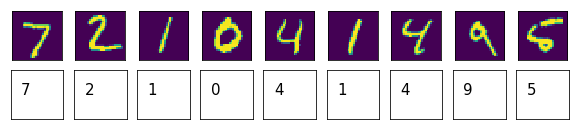

In [66]:
x, y = mnist_test[0:9]
showImages(x)

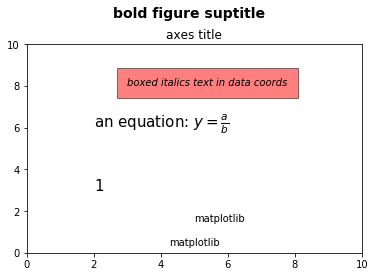

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $ y = \frac{a}{b} $', fontsize=15)

ax.text(2, 3, r'1', fontsize=15)

ax.text(5, 0.5,'matplotlib', horizontalalignment='center',verticalalignment='center')

ax.text(5, 1.5,'matplotlib')

ax.axis([0, 10, 0, 10])

plt.show()

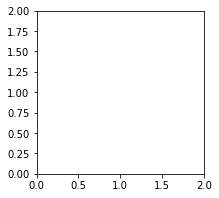

In [29]:
_, ax = plt.subplots(figsize=(3,3))
ax.axis([0, 2, 0, 2])
plt.show()

(0.0, 1.0, 0.0, 1.0)


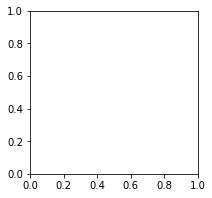

In [35]:
_, ax = plt.subplots(figsize=(3,3))
print(ax.axis())
plt.show()

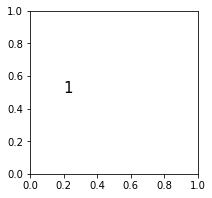

In [40]:
_, ax = plt.subplots(figsize=(3,3))
ax.text(0.2, 0.5,'1',fontsize=15)
plt.show()

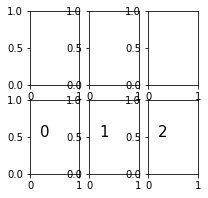

In [51]:
_, ax = plt.subplots(2, 3, figsize=(3,3))
for x in range(3):
    ax[1,x].text(0.2, 0.5,x,fontsize=15)
plt.show()

In [78]:
import matplotlib

In [79]:
matplotlib.use('TkAgg')

d:\users\yongjia\miniconda3\envs\py36\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


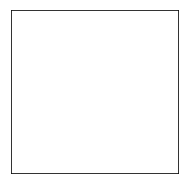

In [94]:
_, ax = plt.subplots(figsize=(3,3))
# ax.figure.
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
# matplotlib.artist.setp(ax,color='red')
plt.show()


matplotlib.axes._subplots.AxesSubplot

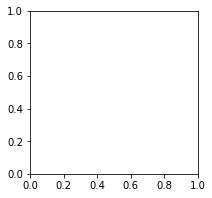

In [97]:
_, ax = plt.subplots(figsize=(3,3))
type(ax)

In [101]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

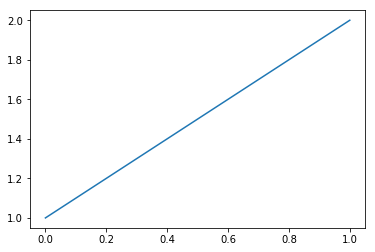

In [105]:
line, = plt.plot([1,2])

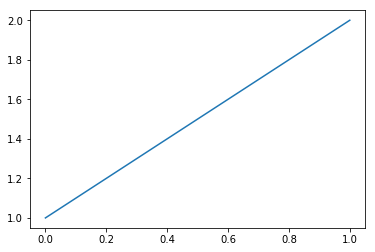

In [104]:
line, = plt.plot([0,1],[1,2])

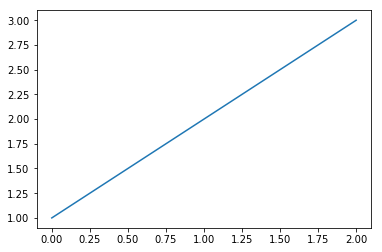

In [103]:
line, = plt.plot([0,1,2],[1,2,3])

[None]

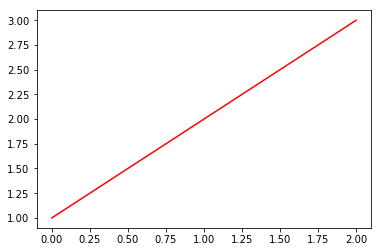

In [100]:
line, = plt.plot([1,2,3])
matplotlib.artist.setp(line,color='red')

matplotlib.lines.Line2D

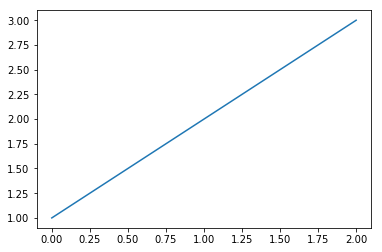

In [95]:
line, = plt.plot([1,2,3])
type(line)

In [92]:
matplotlib.artist.setp(line,color='red')

[None]

In [84]:
help(matplotlib.artist.setp)

Help on function setp in module matplotlib.artist:

setp(obj, *args, **kwargs)
    Set a property on an artist object.
    
    matplotlib supports the use of :func:`setp` ("set property") and
    :func:`getp` to set and get object properties, as well as to do
    introspection on the object.  For example, to set the linestyle of a
    line to be dashed, you can do::
    
      >>> line, = plot([1,2,3])
      >>> setp(line, linestyle='--')
    
    If you want to know the valid types of arguments, you can provide the
    name of the property you want to set without a value::
    
      >>> setp(line, 'linestyle')
          linestyle: [ '-' | '--' | '-.' | ':' | 'steps' | 'None' ]
    
    If you want to see all the properties that can be set, and their
    possible values, you can do::
    
      >>> setp(line)
          ... long output listing omitted
    
    :func:`setp` operates on a single instance or a list of instances.
    If you are in query mode introspecting the possible val

In [83]:
matplotlib.artist.setp(ec,'red')

NameError: name 'ec' is not defined

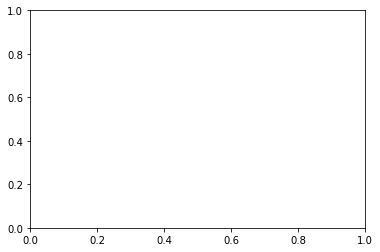

In [99]:
_, ax = plt.subplots()